# 03.05 Plotting Engines

We now know a good deal about making figures with `matpotlib`
but there's, of course, much, much more.
Two things that we did not yet touch are `matplotlib` interfaces outside of `jupyter`,
and its interfaces to other libraries. 

![Engine](plt-engine.svg)

<div style="text-align:right;"><sup>plt-engine.svg</sup></div>

Let's import `matplotlib` the normal `jupyter` way for now.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## Styles

One can use style-sheets with `matplotlib`,
these style-sheets contain default configuration that alter the look and feel of all plots.
Many higher level interfaces use style-sheets to integrate into `matplotlib`,
to list the installed style-sheets we can perform the following.

The styles with *talk* and *poster* in their names increase the size
of all labels.  We will use some of these styles from here on
in order to read graphs easier.

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

And to enable one such style one would.

In [3]:
plt.style.use("ggplot")

Unfortunately applying a second style (i.e. changing styles) on the fly does not really work.
The style-sheet changes `matplotlib` globals, which another style may not adapt.

That said, one can use `plt.style.context` to enable a style for a small part of code.
Or create one's own styles with [style sheets][style].

[style]: https://matplotlib.org/users/style_sheets.html "Style Sheets"

For now let's have a look at the style we applied:

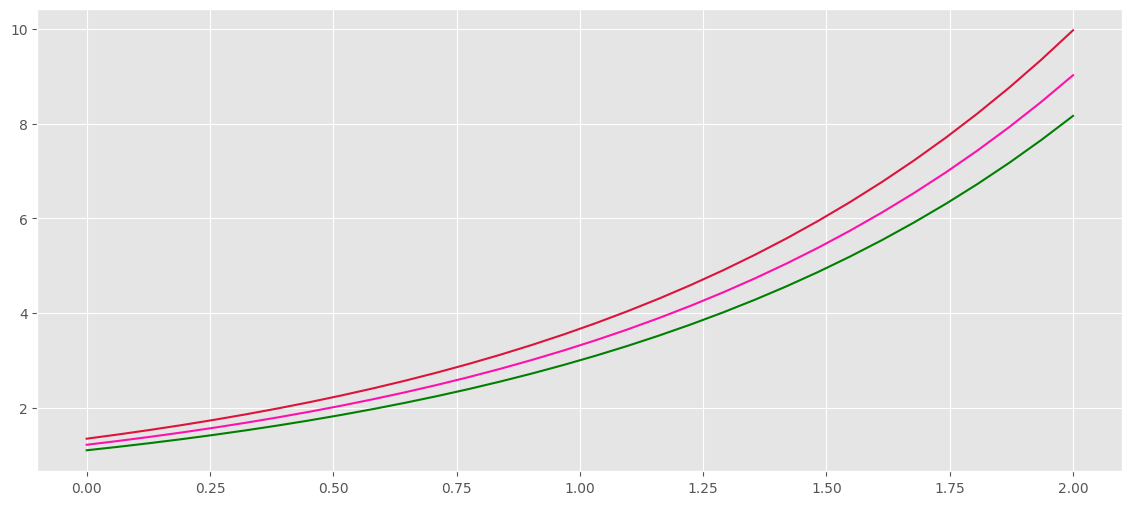

In [4]:
fig, ax = plt.subplots(figsize=(14, 6))
x = np.linspace(0, 2, 32)

ax.plot(x, np.exp(x + 0.1), color="green")
ax.plot(x, np.exp(x + 0.2), color="#fe11aa")
ax.plot(x, np.exp(x + 0.3), color="crimson");

This is quite different from the graphs we saw until now.
One can experiment with styles before attempting to customize
a graph to their liking.

## `show()`?

In `matplotlib` code outside of `jupyter` the `show` function is almost always used.
The `show` functions tells the `matplotlib` backed to actually draw and display the figure.
Inside `jupyter` the `%matplotlib inline` magic does that for us automatically.
(In reality `%matplotlib inline` saves the figure to memory, computes the base64
representation of it and injects a `data:` URL into the notebook).
Within IPython the `%matplotlib` magic functions similarly,
it will generate, and update, an image everytime a plotting function is called.

Yet, when we are not working interactively (Jupyter, IPython, or even something else)
we do not always want to open a window with an image.
For example, script that should generate graphs on disk on headless servers
probably have no need to display the images (and that would fail anyway).
The `show` function in scripts is an explicit way of telling `matplotlib`
to actually draw and show the image.

Yet note that `show` can only be called once in a script.
It sets several global values in the backend display engine,
and these values may not be optimal for all plots.
(i.e. a second call to `show` may result in an ugly plot,
or even a plain error.)

For example to make a script showing an image one would do:

```python
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2, 128)

fig, ax = plt.subplots(figsize=(30, 30))
ax.plot(x, np.exp(x), '-.g')

plt.show()
```

## Save the Graph

If we do not want to `show` a graph we probably want to save it
to a file - or send it over the network, or similar.
The previous script can save the figure instead of displaying it:

```python
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2, 128)

fig, ax = plt.subplots(figsize=(30, 30))
ax.plot(x, np.exp(x), '-.g')

fig.savefig('natural_exponent.png', dpi=300)
```

But we can save graphs from Jupyter too.
We simply use `savefig` on the figure object.
We saw that the default DPI (dots per inch) in Jupyter is around 72 DPI,
that is good enough for display but certainly not good enough for printing.
`savefig=` accepts a `dpi=` parameter to change the DPI to a value appropriate
for the consuming application of the image.

Note that the `%matplotlib inline` magic will still display the image.

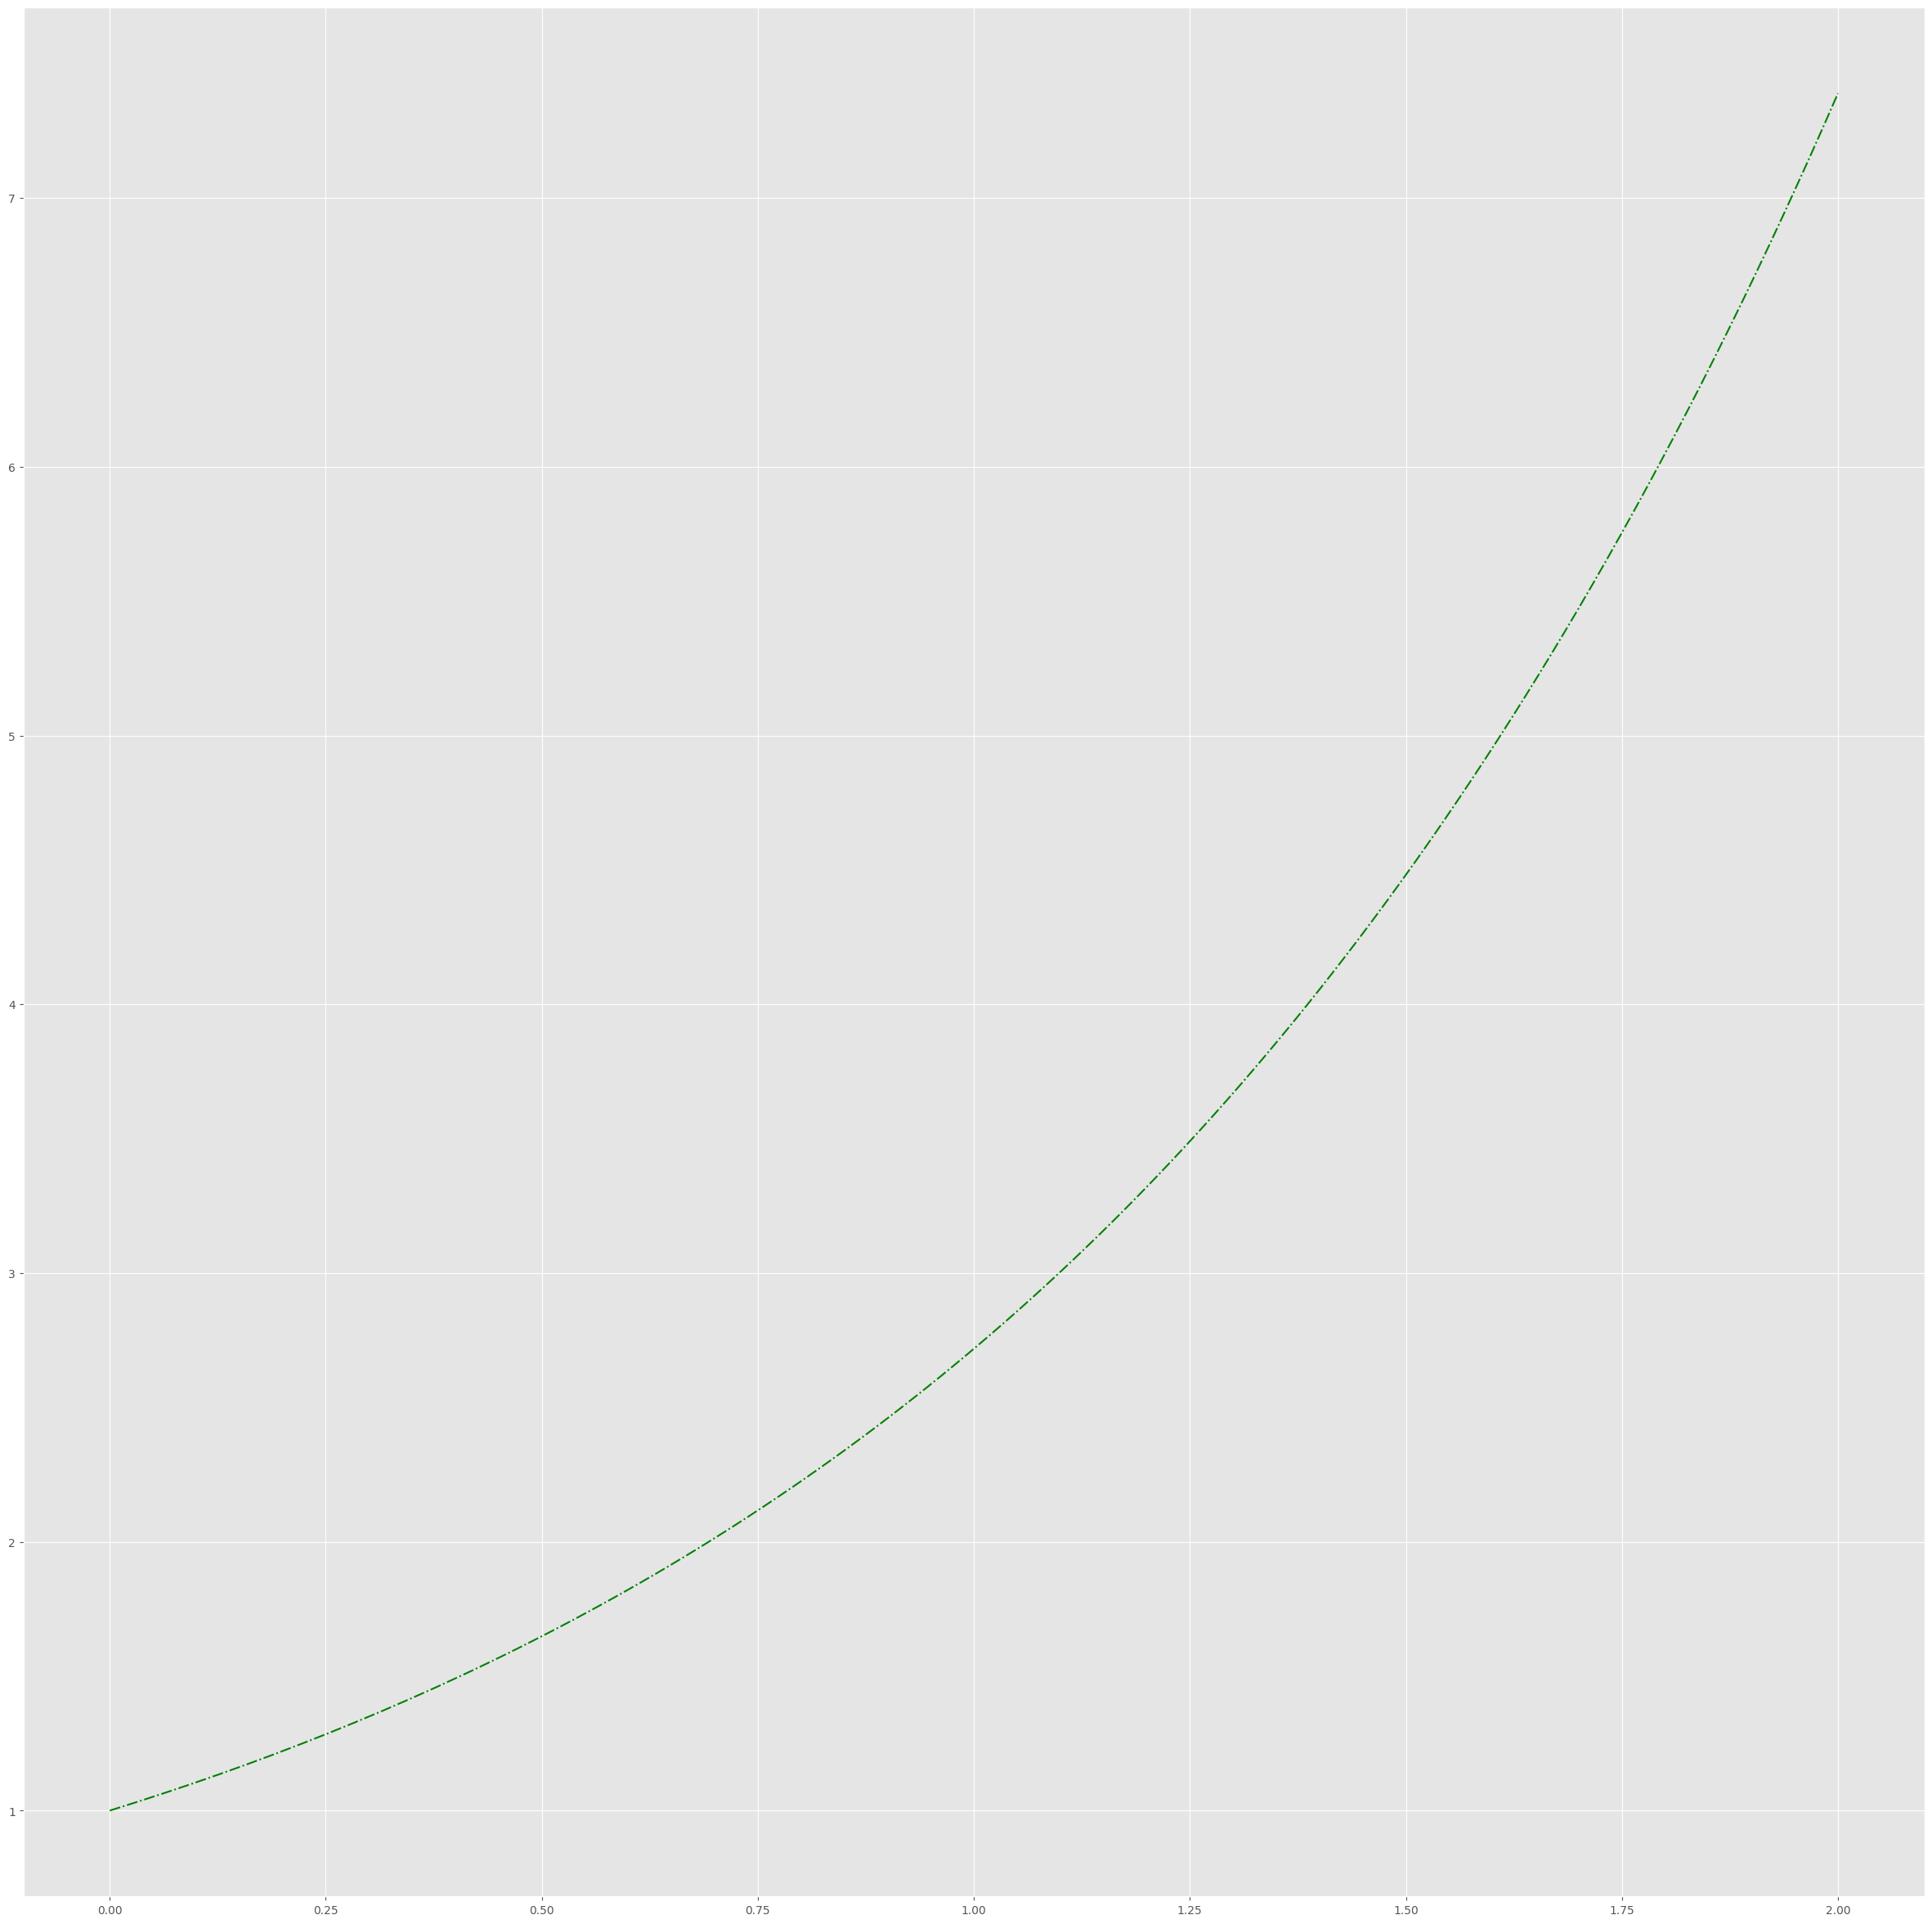

In [5]:
fig, ax = plt.subplots(figsize=(30, 30))
x = np.linspace(0, 2, 128)
ax.plot(x, np.exp(x), "-.g")
fig.savefig("natural_exponent.png", dpi=300);

PNG (Portable Network Graphics) is the default format in `matplotlib`
but, by far, not the only one.
Let's get the list of supported formats in our installation.

In [6]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

### Extra: current Working Directory in Jupyter

OK, we apparently saved an image to disk but where it is?

In Python all paths are understood in the UNIX fashion:

- Paths starting with `/` are absolute paths
- All other paths are relative to the current working directory

Jupyter sets the current working directory of its kernel - the engine
actually executing the code - to the path of the notebook itself.
Therefore our image is in the same directory as the notebook we are running.

Note: In Python you can (and should) use `/` as the path separator on
both UNIX-like and MS Windows systems.

## Other engines

`matplotlib` is less clunky in recent versions than it was a handful of years ago.
But the clunkiness is of the interface into it and its plotting defaults.
The plotting engine of `matplotlib` is sturdy and deals well
with many visualization problems.
Despite that, over the years other plotting interfaces have been developed,
some of which extend `matplotlib` with more plot types,
some change the appearance of plots.
Some very well known extensions include:

- [ggplot][] simulates plotting from the R environment.
For a long time its graphs had better appearance than
`matplotlib` defaults.
It also works better with `pandas` than plain `matplotlib` does.
That said, behind the scened `ggplot` calls the `matplotlib`
engine for the plotting.

- [seaborn][] extends `matplotlib` with several
statistics oriented graphs.
All `seaborn` does is to utilize the `matplotlib`
engine to draw more complex graphs.
That said, if one needs specific graphs:
voilinplots, boxplots, heatmaps, joint distribution
plots or cluster maps; one can just use the `seaborn`
interfaces instead of writing such a plot from scratch
in `matplotlib`.

[ggplot]: http://ggplot.yhathq.com/ "ggplot"
[seaborn]: https://seaborn.pydata.org/ "seaborn"

Once the amount of data surpasses the memory of the machine we are working with,
or we need interactive plots, `matplotlib` is placed out of its depth.
For such problem completely different plotting engines are needed.
Some such engines are called together the *pyViz* group,
for Python Visualization.
Some libraries there are:

- [bokeh][] provides a way of generating, from Python, web pages
that will display data and allow for interactive graphs.
The data can be provided in chunks, allowing for big amounts
of data to be used for the plotting.

- [holoviews][] uses *bokeh*, or possibly another renderer,
to plot visualizations.
Where visualizations are plots or other aspects of the data
which can be useful during data analysis.

- [dask][] is a cluster engine that can distribute
the plotting across several machines.
When one needs to plot more data that would fit in the memory
of any machine, *dask* is the tool in Python for the job.

- [d3js][] is a JavaScript library but it is often used in
combination with Python webservers to create visualizations.

[bokeh]: https://bokeh.org/ "Bokeh"
[holoviews]: https://holoviews.org/ "Holo Views"
[dask]: https://dask.org/ "Dask"
[d3js]: https://d3js.org/ "D3.js"

`matplotlib`itself has visualization capabilities under the magic
`%matplotlib notebook` (instead of `%matplotlib inline`)
but these are quite limited.

## References

- [Style Usage - matplotlib][rcparms]
- [Style Reference - matplotlib][styleref]

[rcparms]: https://matplotlib.org/tutorials/introductory/customizing.html "Style Usage"
[styleref]: https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html "Style Reference"